In [1]:
from generate_samples import SyntheticDAG
from causal_peeler_e import *
# from causal_peeler import *
from causal_peeler_t import *
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from torch.autograd.functional import jacobian
import pandas as pd
from tabulate import tabulate
import seaborn as sns
from random import random
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.colors import LinearSegmentedColormap

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/ryanwelch/opt/anaconda3/envs/causal2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def sample_full_rank_matrix(n=3, lower=-10, upper=10):
    while True:
        matrix = torch.FloatTensor(n, n).uniform_(lower, upper)
        matrix.requires_grad_(True)
        matrix.retain_grad()
        if torch.det(matrix).item() != 0:
            return matrix


In [3]:
def max_diff(x, H_diff_sym):
    max_diff = 0.0
    for mat in H_diff_sym:
        val = np.abs(x@mat@x)
        max_diff = max(max_diff, val)
    return max_diff

In [4]:
# for i in graph.top_order:
#     print(i)
#     # print(graph.means[i], torch.mean(U[:,i] - graph.coeffs[i]*graph.apply_f(U[:, list(graph.DAG.parents_of(i))])), torch.mean(U[:,i] - graph.coeffs[i]*graph.apply_f(U[:, list(graph.DAG.parents_of(i))])) - graph.means[i])
#     print(torch.mean(U[:,i]),  torch.mean(graph.coeffs[i]*graph.apply_f(U[:, list(graph.DAG.parents_of(i))]) + graph.means[i]))
#     print(graph.variances[i], torch.var(U[:,i] - graph.coeffs[i]*graph.apply_f(U[:, list(graph.DAG.parents_of(i))]) - graph.means[i]))
#     print()

# Line Graph

In [5]:
DAG_type = 'line'
num_latent = 4
num_samples = 2000
lower_G = -1 #min possibel value in G or G_hat
upper_G = 1 #max possible value in G or G_hat
G = sample_full_rank_matrix(num_latent, lower_G, upper_G)+torch.eye(num_latent)

In [6]:
graph = SyntheticDAG(num_latent, DAG_type)

In [7]:
U,X,noises = graph.sample_scaled(G, num_samples)
# U_tr = U[num_samples:]
# X_tr = X[num_samples:]
# U = U[:num_samples]
# X = X[:num_samples]
# noises = noises[:num_samples]

In [8]:
print(graph.coeffs)
print(graph.variances)
print(graph.means)

[tensor(0.2151), tensor(0.1899), tensor(0.1723), tensor(0.1832)]
[tensor(0.0202), tensor(0.0233), tensor(0.0183), tensor(0.0192)]
[tensor(0.5456), tensor(0.4256), tensor(0.5217), tensor(0.4727)]


In [9]:
# id_layers = identify(graph, U, G)
id_layers = identify(graph, U, X, G, 0)
# id_layers = identify_e(X, X_tr, estimator='ssm')

-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-04-12


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-04-12


Set parameter TimeLimit to value 120


INFO:gurobipy:Set parameter TimeLimit to value 120


Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[rosetta2] - Darwin 21.6.0 21G72)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[rosetta2] - Darwin 21.6.0 21G72)


INFO:gurobipy:


CPU model: Apple M2


INFO:gurobipy:CPU model: Apple M2


Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 0 rows, 4 columns and 0 nonzeros


INFO:gurobipy:Optimize a model with 0 rows, 4 columns and 0 nonzeros


Model fingerprint: 0x6492bc46


INFO:gurobipy:Model fingerprint: 0x6492bc46


Model has 3993 quadratic constraints


INFO:gurobipy:Model has 3993 quadratic constraints


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [0e+00, 0e+00]


INFO:gurobipy:  Matrix range     [0e+00, 0e+00]


  QMatrix range    [1e-04, 6e+01]


INFO:gurobipy:  QMatrix range    [1e-04, 6e+01]


  Objective range  [0e+00, 0e+00]


INFO:gurobipy:  Objective range  [0e+00, 0e+00]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [0e+00, 0e+00]


INFO:gurobipy:  RHS range        [0e+00, 0e+00]


  QRHS range       [1e-02, 1e+00]


INFO:gurobipy:  QRHS range       [1e-02, 1e+00]


INFO:gurobipy:


Continuous model is non-convex -- solving as a MIP


INFO:gurobipy:Continuous model is non-convex -- solving as a MIP


INFO:gurobipy:


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 4029 rows, 14 columns, 40016 nonzeros


INFO:gurobipy:Presolved: 4029 rows, 14 columns, 40016 nonzeros


Presolved model has 10 bilinear constraint(s)


INFO:gurobipy:Presolved model has 10 bilinear constraint(s)


Variable types: 14 continuous, 0 integer (0 binary)


INFO:gurobipy:Variable types: 14 continuous, 0 integer (0 binary)


INFO:gurobipy:


Root relaxation: objective 0.000000e+00, 2023 iterations, 0.05 seconds (0.10 work units)


INFO:gurobipy:Root relaxation: objective 0.000000e+00, 2023 iterations, 0.05 seconds (0.10 work units)


INFO:gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy:


     0     0    0.00000    0   10          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0   10          -    0.00000      -     -    0s


     0     0    0.00000    0   10          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0   10          -    0.00000      -     -    0s


     0     0    0.00000    0   10          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0   10          -    0.00000      -     -    0s


     0     0    0.00000    0   10          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0   10          -    0.00000      -     -    0s


     0     0    0.00000    0   10          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0   10          -    0.00000      -     -    0s


     0     0    0.00000    0   10          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0   10          -    0.00000      -     -    0s


     0     0    0.00000    0   10          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0   10          -    0.00000      -     -    0s


     0     0    0.00000    0   10          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0   10          -    0.00000      -     -    0s


     0     0    0.00000    0   10          -    0.00000      -     -    1s


INFO:gurobipy:     0     0    0.00000    0   10          -    0.00000      -     -    1s


H    0     0                       0.0000000    0.00000  0.00%     -    1s


INFO:gurobipy:H    0     0                       0.0000000    0.00000  0.00%     -    1s


     0     0    0.00000    0   10    0.00000    0.00000  0.00%     -    1s


INFO:gurobipy:     0     0    0.00000    0   10    0.00000    0.00000  0.00%     -    1s


INFO:gurobipy:


Cutting planes:


INFO:gurobipy:Cutting planes:


  PSD: 1


INFO:gurobipy:  PSD: 1


INFO:gurobipy:


Explored 1 nodes (2186 simplex iterations) in 1.27 seconds (1.32 work units)


INFO:gurobipy:Explored 1 nodes (2186 simplex iterations) in 1.27 seconds (1.32 work units)


Thread count was 8 (of 8 available processors)


INFO:gurobipy:Thread count was 8 (of 8 available processors)


INFO:gurobipy:


Solution count 1: 0 


INFO:gurobipy:Solution count 1: 0 


INFO:gurobipy:


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy:Optimal solution found (tolerance 1.00e-04)


Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


INFO:gurobipy:Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


Optimal solution found:
[0.44028635 0.43545215 0.01037137 0.78512533]

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[rosetta2] - Darwin 21.6.0 21G72)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[rosetta2] - Darwin 21.6.0 21G72)


INFO:gurobipy:


CPU model: Apple M2


INFO:gurobipy:CPU model: Apple M2


Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 1 rows, 4 columns and 4 nonzeros


INFO:gurobipy:Optimize a model with 1 rows, 4 columns and 4 nonzeros


Model fingerprint: 0xb8f63d8a


INFO:gurobipy:Model fingerprint: 0xb8f63d8a


Model has 3993 quadratic constraints


INFO:gurobipy:Model has 3993 quadratic constraints


Variable types: 4 continuous, 0 integer (0 binary)


INFO:gurobipy:Variable types: 4 continuous, 0 integer (0 binary)


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-02, 8e-01]


INFO:gurobipy:  Matrix range     [1e-02, 8e-01]


  QMatrix range    [1e-04, 6e+01]


INFO:gurobipy:  QMatrix range    [1e-04, 6e+01]


  Objective range  [0e+00, 0e+00]


INFO:gurobipy:  Objective range  [0e+00, 0e+00]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [0e+00, 0e+00]


INFO:gurobipy:  RHS range        [0e+00, 0e+00]


  QRHS range       [1e-02, 1e+00]


INFO:gurobipy:  QRHS range       [1e-02, 1e+00]


INFO:gurobipy:


MIP start from previous solve did not produce a new incumbent solution


INFO:gurobipy:MIP start from previous solve did not produce a new incumbent solution


INFO:gurobipy:


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 4030 rows, 14 columns, 40020 nonzeros


INFO:gurobipy:Presolved: 4030 rows, 14 columns, 40020 nonzeros


Presolved model has 10 bilinear constraint(s)


INFO:gurobipy:Presolved model has 10 bilinear constraint(s)


INFO:gurobipy:


Solving non-convex MIQCP


INFO:gurobipy:Solving non-convex MIQCP


INFO:gurobipy:


Variable types: 14 continuous, 0 integer (0 binary)


INFO:gurobipy:Variable types: 14 continuous, 0 integer (0 binary)


INFO:gurobipy:


Root relaxation: objective 0.000000e+00, 2019 iterations, 0.06 seconds (0.14 work units)


INFO:gurobipy:Root relaxation: objective 0.000000e+00, 2019 iterations, 0.06 seconds (0.14 work units)


INFO:gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy:


     0     0    0.00000    0   10          -    0.00000      -     -    1s


INFO:gurobipy:     0     0    0.00000    0   10          -    0.00000      -     -    1s


     0     0    0.00000    0   10          -    0.00000      -     -    1s


INFO:gurobipy:     0     0    0.00000    0   10          -    0.00000      -     -    1s


     0     0 infeasible    0               - infeasible      -     -    1s


INFO:gurobipy:     0     0 infeasible    0               - infeasible      -     -    1s


INFO:gurobipy:


Cutting planes:


INFO:gurobipy:Cutting planes:


  RLT: 4


INFO:gurobipy:  RLT: 4


INFO:gurobipy:


Explored 1 nodes (2054 simplex iterations) in 1.65 seconds (1.27 work units)


INFO:gurobipy:Explored 1 nodes (2054 simplex iterations) in 1.65 seconds (1.27 work units)


Thread count was 8 (of 8 available processors)


INFO:gurobipy:Thread count was 8 (of 8 available processors)


INFO:gurobipy:


Solution count 0


INFO:gurobipy:Solution count 0


INFO:gurobipy:


Model is infeasible


INFO:gurobipy:Model is infeasible


Best objective -, best bound -, gap -


INFO:gurobipy:Best objective -, best bound -, gap -


No feasible solution found.
Done.

U_hat as a linear combination of U:
[[-1.00537836e+00  5.22896046e-02  8.62498620e-01  1.80986638e+00]
 [-7.89154603e-01  5.75137394e-01 -7.91415178e-01  1.08191050e-03]
 [ 1.44521812e+00  2.21988381e-01  1.26886741e-01 -4.47021686e-03]
 [ 1.28562164e-01 -9.31908427e-02  2.04979045e+00 -1.72679257e-04]]

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter TimeLimit to value 120


INFO:gurobipy:Set parameter TimeLimit to value 120


Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[rosetta2] - Darwin 21.6.0 21G72)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[rosetta2] - Darwin 21.6.0 21G72)


INFO:gurobipy:


CPU model: Apple M2


INFO:gurobipy:CPU model: Apple M2


Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 0 rows, 3 columns and 0 nonzeros


INFO:gurobipy:Optimize a model with 0 rows, 3 columns and 0 nonzeros


Model fingerprint: 0x7ea1168a


INFO:gurobipy:Model fingerprint: 0x7ea1168a


Model has 3993 quadratic constraints


INFO:gurobipy:Model has 3993 quadratic constraints


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [0e+00, 0e+00]


INFO:gurobipy:  Matrix range     [0e+00, 0e+00]


  QMatrix range    [1e-03, 3e+01]


INFO:gurobipy:  QMatrix range    [1e-03, 3e+01]


  Objective range  [0e+00, 0e+00]


INFO:gurobipy:  Objective range  [0e+00, 0e+00]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [0e+00, 0e+00]


INFO:gurobipy:  RHS range        [0e+00, 0e+00]


  QRHS range       [1e-02, 1e+00]


INFO:gurobipy:  QRHS range       [1e-02, 1e+00]


INFO:gurobipy:


Continuous model is non-convex -- solving as a MIP


INFO:gurobipy:Continuous model is non-convex -- solving as a MIP


INFO:gurobipy:


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 4014 rows, 9 columns, 24006 nonzeros


INFO:gurobipy:Presolved: 4014 rows, 9 columns, 24006 nonzeros


Presolved model has 6 bilinear constraint(s)


INFO:gurobipy:Presolved model has 6 bilinear constraint(s)


Variable types: 9 continuous, 0 integer (0 binary)


INFO:gurobipy:Variable types: 9 continuous, 0 integer (0 binary)


INFO:gurobipy:


Root relaxation: objective 0.000000e+00, 2025 iterations, 0.05 seconds (0.09 work units)


INFO:gurobipy:Root relaxation: objective 0.000000e+00, 2025 iterations, 0.05 seconds (0.09 work units)


INFO:gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy:


     0     0    0.00000    0    6          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0    6          -    0.00000      -     -    0s


     0     0    0.00000    0    6          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0    6          -    0.00000      -     -    0s


     0     0    0.00000    0    6          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0    6          -    0.00000      -     -    0s


     0     0    0.00000    0    6          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0    6          -    0.00000      -     -    0s


     0     0    0.00000    0    6          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0    6          -    0.00000      -     -    0s


     0     0    0.00000    0    6          -    0.00000      -     -    1s


INFO:gurobipy:     0     0    0.00000    0    6          -    0.00000      -     -    1s


H    0     0                       0.0000000    0.00000  0.00%     -    1s


INFO:gurobipy:H    0     0                       0.0000000    0.00000  0.00%     -    1s


     0     0    0.00000    0    6    0.00000    0.00000  0.00%     -    1s


INFO:gurobipy:     0     0    0.00000    0    6    0.00000    0.00000  0.00%     -    1s


INFO:gurobipy:


Cutting planes:


INFO:gurobipy:Cutting planes:


  RLT: 1


INFO:gurobipy:  RLT: 1


INFO:gurobipy:


Explored 1 nodes (2061 simplex iterations) in 1.25 seconds (1.23 work units)


INFO:gurobipy:Explored 1 nodes (2061 simplex iterations) in 1.25 seconds (1.23 work units)


Thread count was 8 (of 8 available processors)


INFO:gurobipy:Thread count was 8 (of 8 available processors)


INFO:gurobipy:


Solution count 1: 0 


INFO:gurobipy:Solution count 1: 0 


INFO:gurobipy:


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy:Optimal solution found (tolerance 1.00e-04)


Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


INFO:gurobipy:Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


Optimal solution found:
[-0.33327528 -0.00327859  0.94282386]

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[rosetta2] - Darwin 21.6.0 21G72)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[rosetta2] - Darwin 21.6.0 21G72)


INFO:gurobipy:


CPU model: Apple M2


INFO:gurobipy:CPU model: Apple M2


Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 1 rows, 3 columns and 3 nonzeros


INFO:gurobipy:Optimize a model with 1 rows, 3 columns and 3 nonzeros


Model fingerprint: 0xe1c367f8


INFO:gurobipy:Model fingerprint: 0xe1c367f8


Model has 3993 quadratic constraints


INFO:gurobipy:Model has 3993 quadratic constraints


Variable types: 3 continuous, 0 integer (0 binary)


INFO:gurobipy:Variable types: 3 continuous, 0 integer (0 binary)


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [3e-03, 9e-01]


INFO:gurobipy:  Matrix range     [3e-03, 9e-01]


  QMatrix range    [1e-03, 3e+01]


INFO:gurobipy:  QMatrix range    [1e-03, 3e+01]


  Objective range  [0e+00, 0e+00]


INFO:gurobipy:  Objective range  [0e+00, 0e+00]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [0e+00, 0e+00]


INFO:gurobipy:  RHS range        [0e+00, 0e+00]


  QRHS range       [1e-02, 1e+00]


INFO:gurobipy:  QRHS range       [1e-02, 1e+00]


INFO:gurobipy:


MIP start from previous solve did not produce a new incumbent solution


INFO:gurobipy:MIP start from previous solve did not produce a new incumbent solution


INFO:gurobipy:


Presolve time: 0.01s


INFO:gurobipy:Presolve time: 0.01s


INFO:gurobipy:


Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.02 work units)


INFO:gurobipy:Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.02 work units)


Thread count was 1 (of 8 available processors)


INFO:gurobipy:Thread count was 1 (of 8 available processors)


INFO:gurobipy:


Solution count 0


INFO:gurobipy:Solution count 0


INFO:gurobipy:


Model is infeasible


INFO:gurobipy:Model is infeasible


Best objective -, best bound -, gap -


INFO:gurobipy:Best objective -, best bound -, gap -


No feasible solution found.
Done.

U_hat as a linear combination of U:
[[ 1.48067768 -0.87213681  2.29558203]
 [ 1.92241489 -0.02483031  0.17718707]
 [-1.53358911  0.82186807 -0.1387824 ]]

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 3.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter TimeLimit to value 120


INFO:gurobipy:Set parameter TimeLimit to value 120


Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[rosetta2] - Darwin 21.6.0 21G72)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[rosetta2] - Darwin 21.6.0 21G72)


INFO:gurobipy:


CPU model: Apple M2


INFO:gurobipy:CPU model: Apple M2


Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 0 rows, 2 columns and 0 nonzeros


INFO:gurobipy:Optimize a model with 0 rows, 2 columns and 0 nonzeros


Model fingerprint: 0xc84bbef9


INFO:gurobipy:Model fingerprint: 0xc84bbef9


Model has 3993 quadratic constraints


INFO:gurobipy:Model has 3993 quadratic constraints


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [0e+00, 0e+00]


INFO:gurobipy:  Matrix range     [0e+00, 0e+00]


  QMatrix range    [2e-05, 1e+01]


INFO:gurobipy:  QMatrix range    [2e-05, 1e+01]


  Objective range  [0e+00, 0e+00]


INFO:gurobipy:  Objective range  [0e+00, 0e+00]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [0e+00, 0e+00]


INFO:gurobipy:  RHS range        [0e+00, 0e+00]


  QRHS range       [1e-02, 1e+00]


INFO:gurobipy:  QRHS range       [1e-02, 1e+00]


INFO:gurobipy:


Continuous model is non-convex -- solving as a MIP


INFO:gurobipy:Continuous model is non-convex -- solving as a MIP


INFO:gurobipy:


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 3924 rows, 5 columns, 11763 nonzeros


INFO:gurobipy:Presolved: 3924 rows, 5 columns, 11763 nonzeros


Presolved model has 3 bilinear constraint(s)


INFO:gurobipy:Presolved model has 3 bilinear constraint(s)


Variable types: 5 continuous, 0 integer (0 binary)


INFO:gurobipy:Variable types: 5 continuous, 0 integer (0 binary)


INFO:gurobipy:


Root relaxation: objective 0.000000e+00, 7 iterations, 0.00 seconds (0.01 work units)


INFO:gurobipy:Root relaxation: objective 0.000000e+00, 7 iterations, 0.00 seconds (0.01 work units)


INFO:gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy:


     0     0    0.00000    0    3          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0    3          -    0.00000      -     -    0s


     0     0    0.00000    0    2          -    0.00000      -     -    0s


INFO:gurobipy:     0     0    0.00000    0    2          -    0.00000      -     -    0s


H    0     0                       0.0000000    0.00000  0.00%     -    0s


INFO:gurobipy:H    0     0                       0.0000000    0.00000  0.00%     -    0s


INFO:gurobipy:


Cutting planes:


INFO:gurobipy:Cutting planes:


  RLT: 1


INFO:gurobipy:  RLT: 1


INFO:gurobipy:


Explored 1 nodes (9 simplex iterations) in 0.51 seconds (0.54 work units)


INFO:gurobipy:Explored 1 nodes (9 simplex iterations) in 0.51 seconds (0.54 work units)


Thread count was 8 (of 8 available processors)


INFO:gurobipy:Thread count was 8 (of 8 available processors)


INFO:gurobipy:


Solution count 1: 0 


INFO:gurobipy:Solution count 1: 0 


INFO:gurobipy:


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy:Optimal solution found (tolerance 1.00e-04)


Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


INFO:gurobipy:Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


Optimal solution found:
[-0.03119613  0.99951328]

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[rosetta2] - Darwin 21.6.0 21G72)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[rosetta2] - Darwin 21.6.0 21G72)


INFO:gurobipy:


CPU model: Apple M2


INFO:gurobipy:CPU model: Apple M2


Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 1 rows, 2 columns and 2 nonzeros


INFO:gurobipy:Optimize a model with 1 rows, 2 columns and 2 nonzeros


Model fingerprint: 0x32ce7d42


INFO:gurobipy:Model fingerprint: 0x32ce7d42


Model has 3993 quadratic constraints


INFO:gurobipy:Model has 3993 quadratic constraints


Variable types: 2 continuous, 0 integer (0 binary)


INFO:gurobipy:Variable types: 2 continuous, 0 integer (0 binary)


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [3e-02, 1e+00]


INFO:gurobipy:  Matrix range     [3e-02, 1e+00]


  QMatrix range    [2e-05, 1e+01]


INFO:gurobipy:  QMatrix range    [2e-05, 1e+01]


  Objective range  [0e+00, 0e+00]


INFO:gurobipy:  Objective range  [0e+00, 0e+00]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [0e+00, 0e+00]


INFO:gurobipy:  RHS range        [0e+00, 0e+00]


  QRHS range       [1e-02, 1e+00]


INFO:gurobipy:  QRHS range       [1e-02, 1e+00]


INFO:gurobipy:


MIP start from previous solve did not produce a new incumbent solution


INFO:gurobipy:MIP start from previous solve did not produce a new incumbent solution


INFO:gurobipy:


Presolve removed 1 rows and 1 columns


INFO:gurobipy:Presolve removed 1 rows and 1 columns


Presolve time: 0.00s


INFO:gurobipy:Presolve time: 0.00s


INFO:gurobipy:


Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)


INFO:gurobipy:Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)


Thread count was 1 (of 8 available processors)


INFO:gurobipy:Thread count was 1 (of 8 available processors)


INFO:gurobipy:


Solution count 0


INFO:gurobipy:Solution count 0


INFO:gurobipy:


Model is infeasible


INFO:gurobipy:Model is infeasible


Best objective -, best bound -, gap -


INFO:gurobipy:Best objective -, best bound -, gap -


No feasible solution found.
Done.

U_hat as a linear combination of U:
[[-3.54658602e+00  8.21386678e-01]
 [ 2.70697967e+00  1.18597395e-03]]

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 4.
-----------------------------------------------------------
Peeled off 1 nodes.


In [10]:
def noise_estimation(id_layers):
    noise_estimates = np.zeros_like(id_layers)
    noise_estimates[:,0] = id_layers[:,0]
    for i in range(1,id_layers.shape[1]):
        degree = 2  # Degree of the polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(id_layers[:,list(range(i))])
        model = LinearRegression()
        model.fit(X_poly, id_layers[:,i])
        noise_estimates[:,i] = id_layers[:,i] - model.predict(X_poly)
    return noise_estimates


In [11]:
noises_estimates = noise_estimation(id_layers)

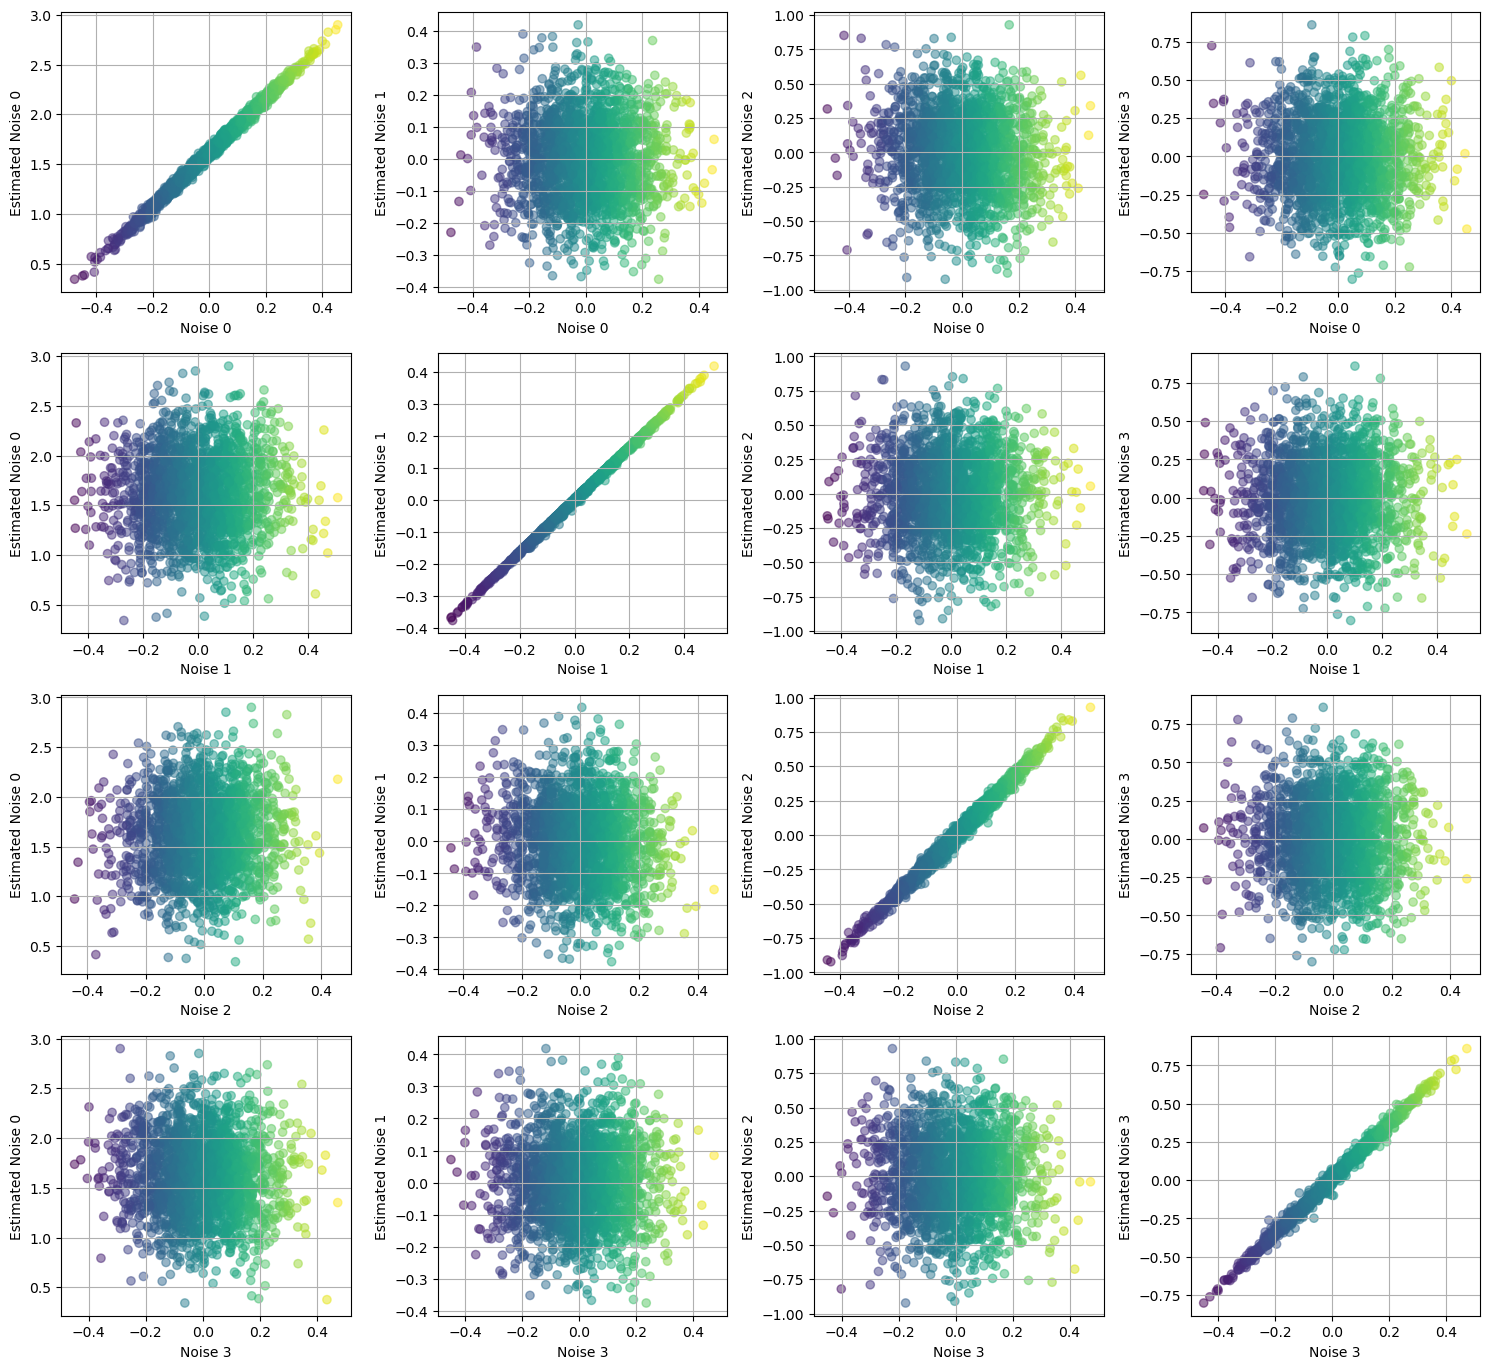

In [12]:
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
# Set a title for the figure
# fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Noise (LINE GRAPH)')

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(noises[:, i], noises_estimates[:, j], alpha=0.5, c = noises[:,i])  # Plotting the scatter plot
        ax.set_xlabel(f'Noise {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Noise {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [13]:
colors = ["lightgray", "cadetblue"]  # Start with gray, end with red
cmap_name = "custom_gray_red"
n_bins = 100  # Use more bins for a smoother transition
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

In [14]:
plt.rcParams.update({'font.size': 30})
data = pivot_df.values  # Convert DataFrame to numpy array if not already

fig, ax = plt.subplots(figsize=(15, 15))
cax = ax.matshow(data, cmap='PuBu')
# fig.colorbar(cax)

# Set ticks positions
ax.set_xticks(np.arange(len(pivot_df.columns)))
ax.set_yticks(np.arange(len(pivot_df.index)))

# Set tick labels
ax.set_xticklabels(pivot_df.columns)
ax.set_yticklabels(pivot_df.index)

# Rotate the x tick labels to avoid overlap
# plt.xticks(rotation0)

# This will place the x-ticks and their labels at the bottom.
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('right')

# Add annotation for cell values
for (i, j), val in np.ndenumerate(data):
    if val>0.5:
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')
    else:
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# Add labels for the axes
ax.set_xlabel('True Noise')
ax.set_ylabel('Estimated Noise')

# plt.title('Heatmap of Pearson Correlation of Noise')
plt.show()


NameError: name 'pivot_df' is not defined

array([[0.72333175, 0.78812486, 0.5138555 , 0.53753394],
       [0.8513059 , 0.6595972 , 0.56096286, 0.5739408 ],
       [0.62189   , 0.28724685, 0.5269622 , 0.31658614],
       ...,
       [0.5386927 , 0.48971093, 0.6413496 , 0.27847844],
       [0.5781663 , 0.36628306, 0.45316005, 0.45852095],
       [0.26094076, 0.10101703, 0.4821158 , 0.4045769 ]], dtype=float32)

In [32]:
np.savetxt("Y_noises_estimate.csv", noise_estimates, delimiter=',', fmt='%f')

In [19]:
#Pearson Correlation
#Mutual Information
#RMSE

results = []
for i in range(num_latent):
    for j in range(num_latent):
        pearson_corr = np.corrcoef(noises[:, i], noises_estimates[:, j])[0, 1]
        results.append({
            'Est. Noise': i,
            'True Noise': j,
            'Pearson Correlation': np.abs(pearson_corr),
        })

df_results = pd.DataFrame(results)

pivot_df = df_results.pivot(index='Est. Noise', columns='True Noise', values='Pearson Correlation')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Pearson Correlation of Noise (LINE GRAPH)')
plt.show()

NameError: name 'noises_estimates' is not defined

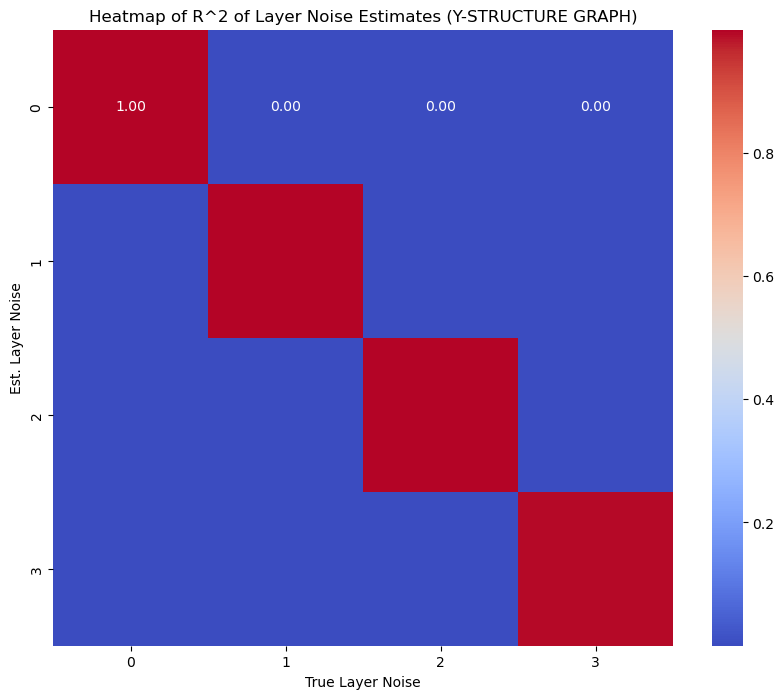

In [36]:
results = []
layers = [[0],[1],[2],[3]]

for i in range(num_latent):
    for j in range(len(layers)):
        model = LinearRegression()
        model.fit(noises[:,layers[j]], noises_estimates[:,i])
        y_pred = model.predict(noises[:,layers[j]])
        r2 = r2_score(noises_estimates[:,i], y_pred)

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Layer Noise': i,
            'True Layer Noise': j,
            'R2': r2
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# # Print the DataFrame using tabulate for a nicer format
# print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

pivot_df = df_results.pivot(index='Est. Layer Noise', columns='True Layer Noise', values='R2')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of R^2 of Layer Noise Estimates (Y-STRUCTURE GRAPH)')
plt.show()

In [1]:
plt.rcParams.update({'font.size': 15})

NameError: name 'plt' is not defined

In [2]:
U_np = U.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))


for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], id_layers[:, j], alpha=0.8, c = U_np[:,0], cmap='PuBu')

        if i == num_latent - 1:  # Last row
            ax.set_xlabel(f'Latent {j+1}')
            plt.setp(ax.get_xticklabels(), visible=False)
        elif i == 0:
            plt.setp(ax.get_xticklabels(), visible=False)
            ax.xaxis.set_ticks_position('top')
        else:
            plt.setp(ax.get_xticklabels(), visible=False)
            # ax.xaxis.set_ticks_position('top')  # Hide x tick labels for other rows
        
        if j == 0:  # First column
            ax.set_ylabel(f'Estimated Latent {i+1}')
            plt.setp(ax.get_yticklabels(), visible=False)

        elif j == num_latent -1:
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.yaxis.set_ticks_position('right')# Make y tick labels visible only for first column
        else:
            plt.setp(ax.get_yticklabels(), visible=False)  # Hide y tick labels for other columns

        ax.grid(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

NameError: name 'U' is not defined

In [3]:
#Pearson Correlation
#Mutual Information
#RMSE

results = []

for i in range(num_latent):
    for j in range(num_latent):
        # Calculate metrics
        pearson_corr = np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1]
        mutual_info = mutual_info_regression(U_np[:, i].reshape(-1, 1), id_layers[:, j])[0]
        rmse = np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j]))

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Latent': i,
            'True Latent': j,
            'Pearson Correlation': pearson_corr,
            'Mutual Information': mutual_info,
            'RMSE': rmse
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# # Print the DataFrame using tabulate for a nicer format
# print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

pivot_df = df_results.pivot(index='Est. Latent', columns='True Latent', values='Pearson Correlation')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Pearson Correlation (LINE GRAPH)')
plt.show()

NameError: name 'num_latent' is not defined

# Y-Structure Graph

In [6]:
DAG_type = 'line'
num_latent = 4
num_samples = 2000
variance_max = 1
lower_G = -1 #min possibel value in G or G_hat
upper_G = 1 #max possible value in G or G_hat

In [7]:
G = sample_full_rank_matrix(num_latent, lower_G, upper_G)+torch.eye(num_latent)
graph = SyntheticDAG(num_latent, DAG_type)
graph.DAG.add_arc(1,3)
graph.DAG.remove_arc(2,3)

Drawing graph...
there are no undirected edges
plotting...


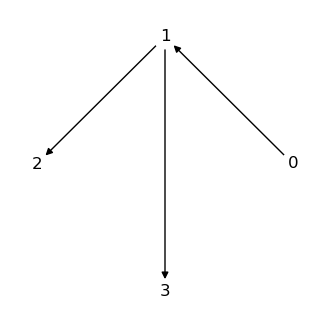

In [8]:
graph.draw_graph()

In [9]:
U,X,noises = graph.sample_scaled(G, num_samples)

In [10]:
print(graph.coeffs)
print(graph.means)
print(graph.variances)

[tensor(0.1736), tensor(0.7453), tensor(0.3787), tensor(0.7180)]
[tensor(0.5200), tensor(0.1970), tensor(0.4369), tensor(0.1940)]
[tensor(0.0292), tensor(0.0071), tensor(0.0156), tensor(0.0085)]


In [11]:
id_layers = identify(graph, U, X, G, 0)

-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-04-12


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-04-12


Set parameter TimeLimit to value 120


INFO:gurobipy:Set parameter TimeLimit to value 120


Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[ 0.48187251  0.31178037  0.72500173 -0.38074188]

Optimal solution found:
[-0.77850971  0.55767361  0.14783845 -0.24711651]

No feasible solution found.
Done.

U_hat as a linear combination of U:
[[-7.40642294e-01 -1.54088383e+00  9.22440860e-01 -9.03290904e-01]
 [ 3.19652366e-01  2.20474942e+00  9.66939442e-01  3.95551861e-01]
 [ 4.41689468e-01 -1.62865637e+00 -5.02593581e-03  4.76378682e-04]
 [ 1.75149045e+00  3.45174566e+00 -2.09052364e-02  2.05140289e-03]]

Peeled off 2 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter TimeLimit to value 120


INFO:gurobipy:Set parameter TimeLimit to value 120


Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[ 0.4267209  -0.90438335]

No feasible solution found.
Done.

U_hat as a linear combination of U:
[[-1.21485000e+00 -3.81668285e+00]
 [ 1.16100116e+00  2.34177575e-06]]

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 3.
-----------------------------------------------------------
Peeled off 1 nodes.


In [12]:
layers = [[0], [1], [2,3]]

In [13]:
def noise_estimation(id_layers, layers):
    noise_estimates = np.zeros_like(id_layers)
    noise_estimates[:,0] = id_layers[:,0]
    upstream=[0]
    for layer in layers[1:]:
        for i in layer:
            degree = 2  # Degree of the polynomial features
            poly_features = PolynomialFeatures(degree=degree)
            X_poly = poly_features.fit_transform(id_layers[:,upstream])
            model = LinearRegression()
            model.fit(X_poly, id_layers[:,i])
            noise_estimates[:,i] = id_layers[:,i] - model.predict(X_poly)
        upstream+=layer
    return noise_estimates


In [14]:
noise_estimates = noise_estimation(id_layers, layers)

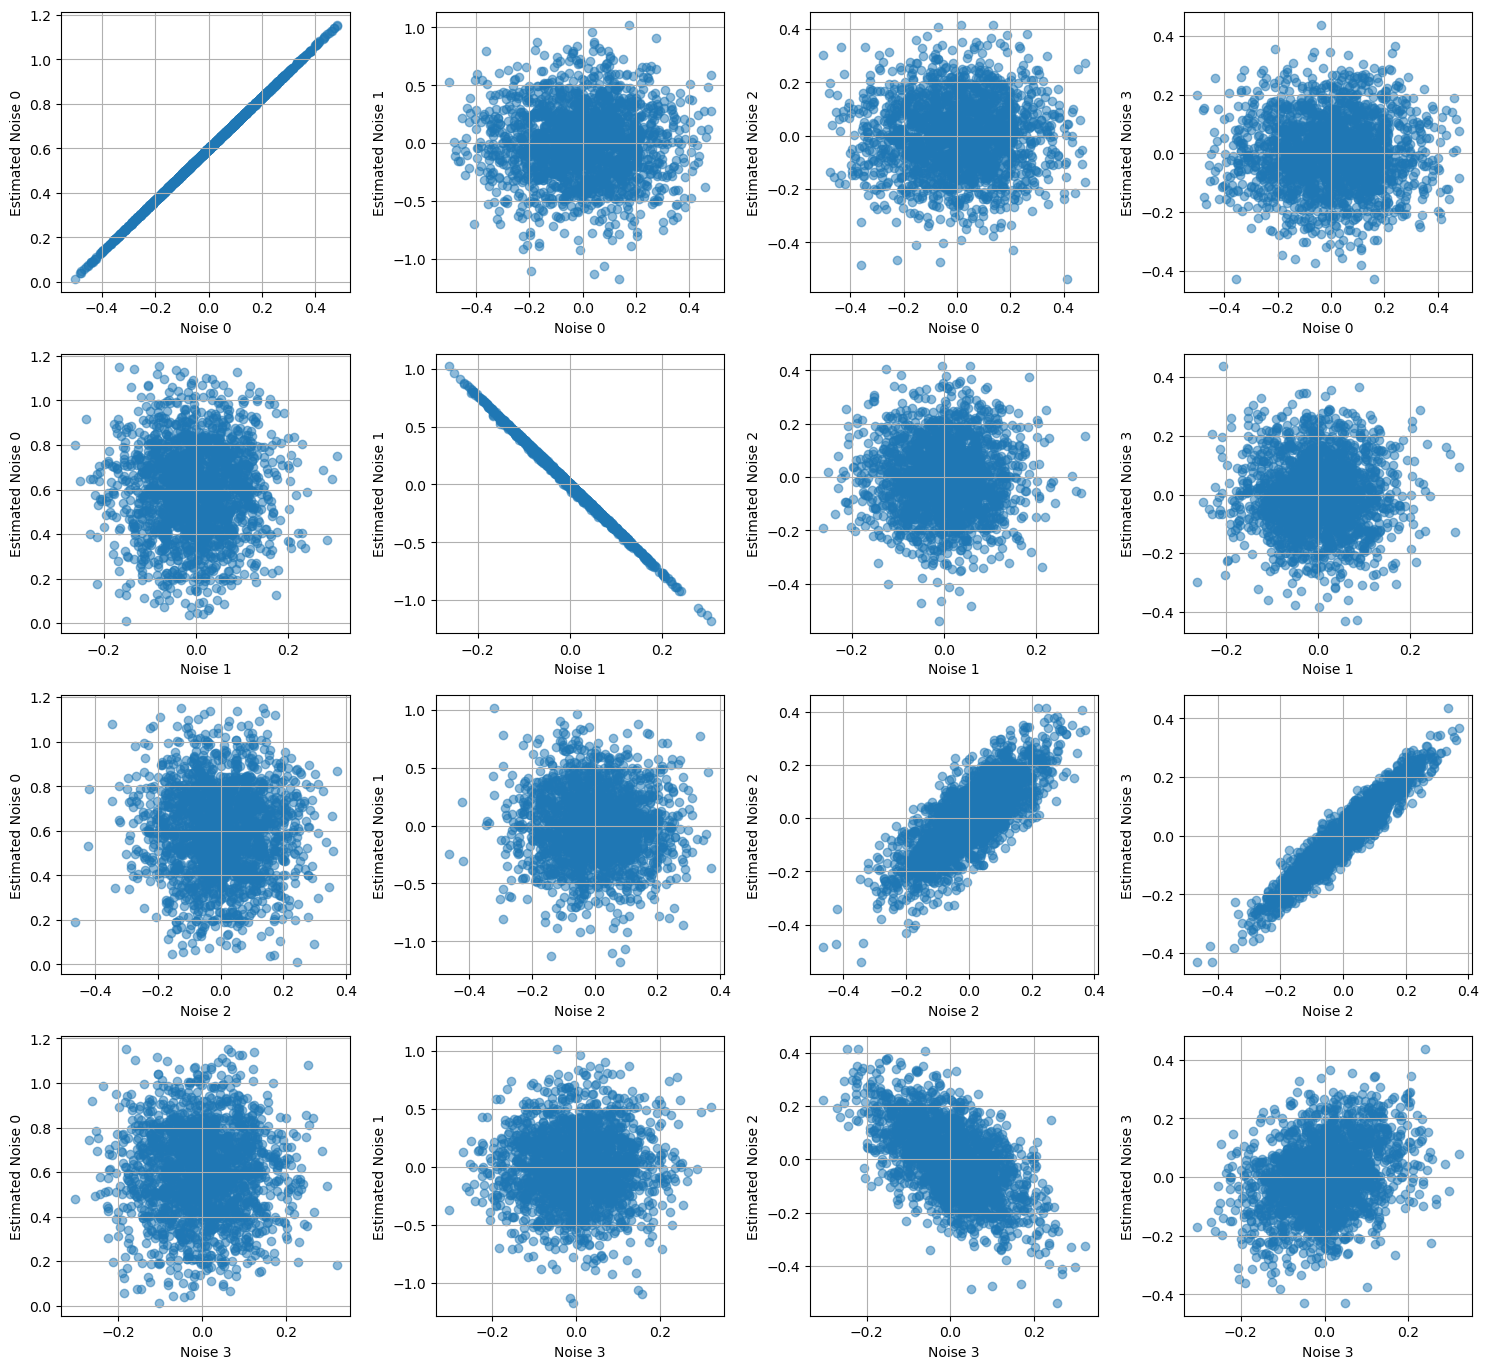

In [15]:
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
# Set a title for the figure
# fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Noise (Y-STRUCTURE GRAPH)')

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(noises[:, i], noise_estimates[:, j], alpha=0.5)  # Plotting the scatter plot
        ax.set_xlabel(f'Noise {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Noise {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


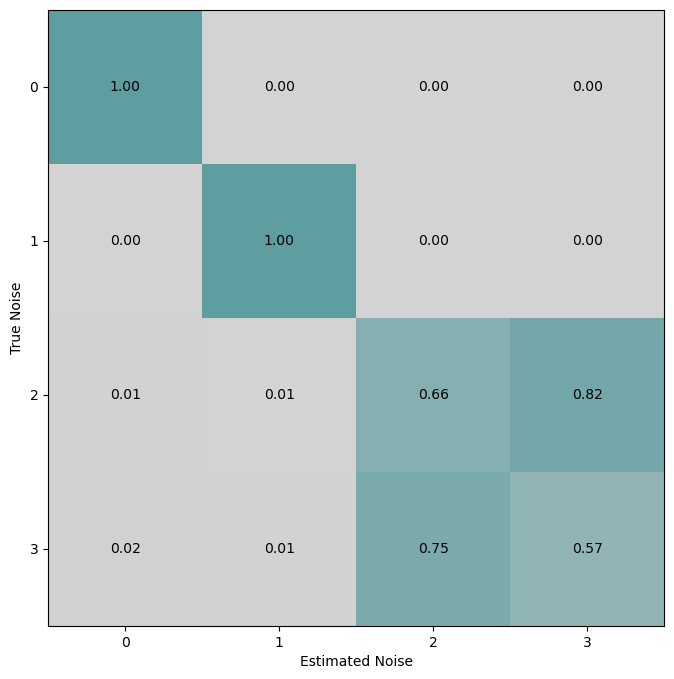

In [90]:
results = []

for i in range(num_latent):
    for j in range(num_latent):
        # Calculate metrics
        pearson_corr = np.corrcoef(noises[:, i], noise_estimates[:, j])[0, 1]

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Noise': i,
            'True Noise': j,
            'Pearson Correlation': np.abs(pearson_corr)
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# # Print the DataFrame using tabulate for a nicer format
# print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

pivot_df = df_results.pivot(index='Est. Noise', columns='True Noise', values='Pearson Correlation')

data = pivot_df.values  # Convert DataFrame to numpy array if not already

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(data, cmap=custom_cmap)
# fig.colorbar(cax)

# Set ticks positions
ax.set_xticks(np.arange(len(pivot_df.columns)))
ax.set_yticks(np.arange(len(pivot_df.index)))

# Set tick labels
ax.set_xticklabels(pivot_df.columns)
ax.set_yticklabels(pivot_df.index)

# Rotate the x tick labels to avoid overlap
plt.xticks(rotation=90)

# This will place the x-ticks and their labels at the bottom.
ax.xaxis.set_ticks_position('bottom')

# Add annotation for cell values
for (i, j), val in np.ndenumerate(data):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# Add labels for the axes
ax.set_xlabel('Estimated Noise')
ax.set_ylabel('True Noise')

# plt.title('Heatmap of Pearson Correlation of Noise')
plt.show()


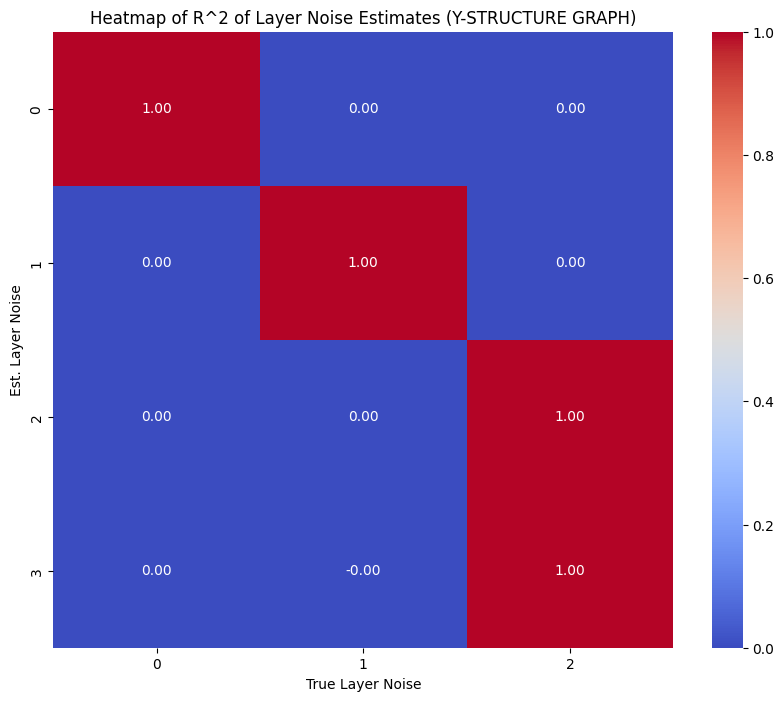

In [ ]:
results = []

for i in range(num_latent):
    for j in range(len(layers)):
        model = LinearRegression()
        model.fit(noises[:,layers[j]], noise_estimates[:,i])
        y_pred = model.predict(noises[:,layers[j]])
        r2 = r2_score(noise_estimates[:,i], y_pred)

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Layer Noise': i,
            'True Layer Noise': j,
            'R2': r2
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# # Print the DataFrame using tabulate for a nicer format
# print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

pivot_df = df_results.pivot(index='Est. Layer Noise', columns='True Layer Noise', values='R2')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of R^2 of Layer Noise Estimates (Y-STRUCTURE GRAPH)')
plt.show()

# BARBASI ALBERT

In [ ]:
DAG_type = 'barabasialbert'
num_latent = 4
num_samples = 5000
lower_G = -1 #min possibel value in G or G_hat
upper_G = 1 #max possible value in G or G_hat

there are no undirected edges
plotting...


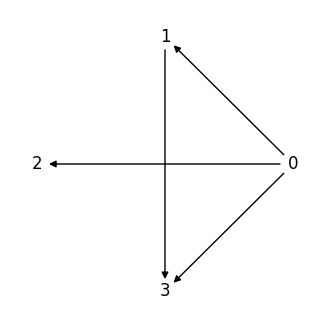

In [ ]:
graph = SyntheticDAG(num_latent, DAG_type)
graph.draw_graph()
G = sample_full_rank_matrix(num_latent, lower_G, upper_G)+torch.eye(num_latent)

In [ ]:
U,X,noises = graph.sample_scaled(G, num_samples)

In [ ]:
id_layers = identify(graph, U, G)

-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[ 0.36371898 -0.01293994  0.09571885  0.90568496]

Optimal solution found:
[-0.47345974 -0.1022685   0.86474458  0.09728613]

No feasible solution found.
Done.

U_hat as a linear combination of U:
[[ 1.82602053e-01 -4.68593471e-01  4.38289133e-01  1.55473738e+00]
 [-5.93297849e-01 -8.10111220e-01  1.93984339e+00  1.53344822e-01]
 [-8.28689347e-01  9.26144532e-01 -1.66470768e-05 -2.58191523e-06]
 [ 5.69954274e-01  5.54447980e-01 -3.40733458e-05 -6.97312819e-06]]

Peeled off 2 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[0.81417481 0.48738689]

No feasible solution found.
Done.

U_hat as a linear combination of U:
[[-2.65140496e+00  1.13747479e+00]
 [ 2.28840325e+00  7.09134866e-05]]

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 3.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Peeled off 1 nodes.


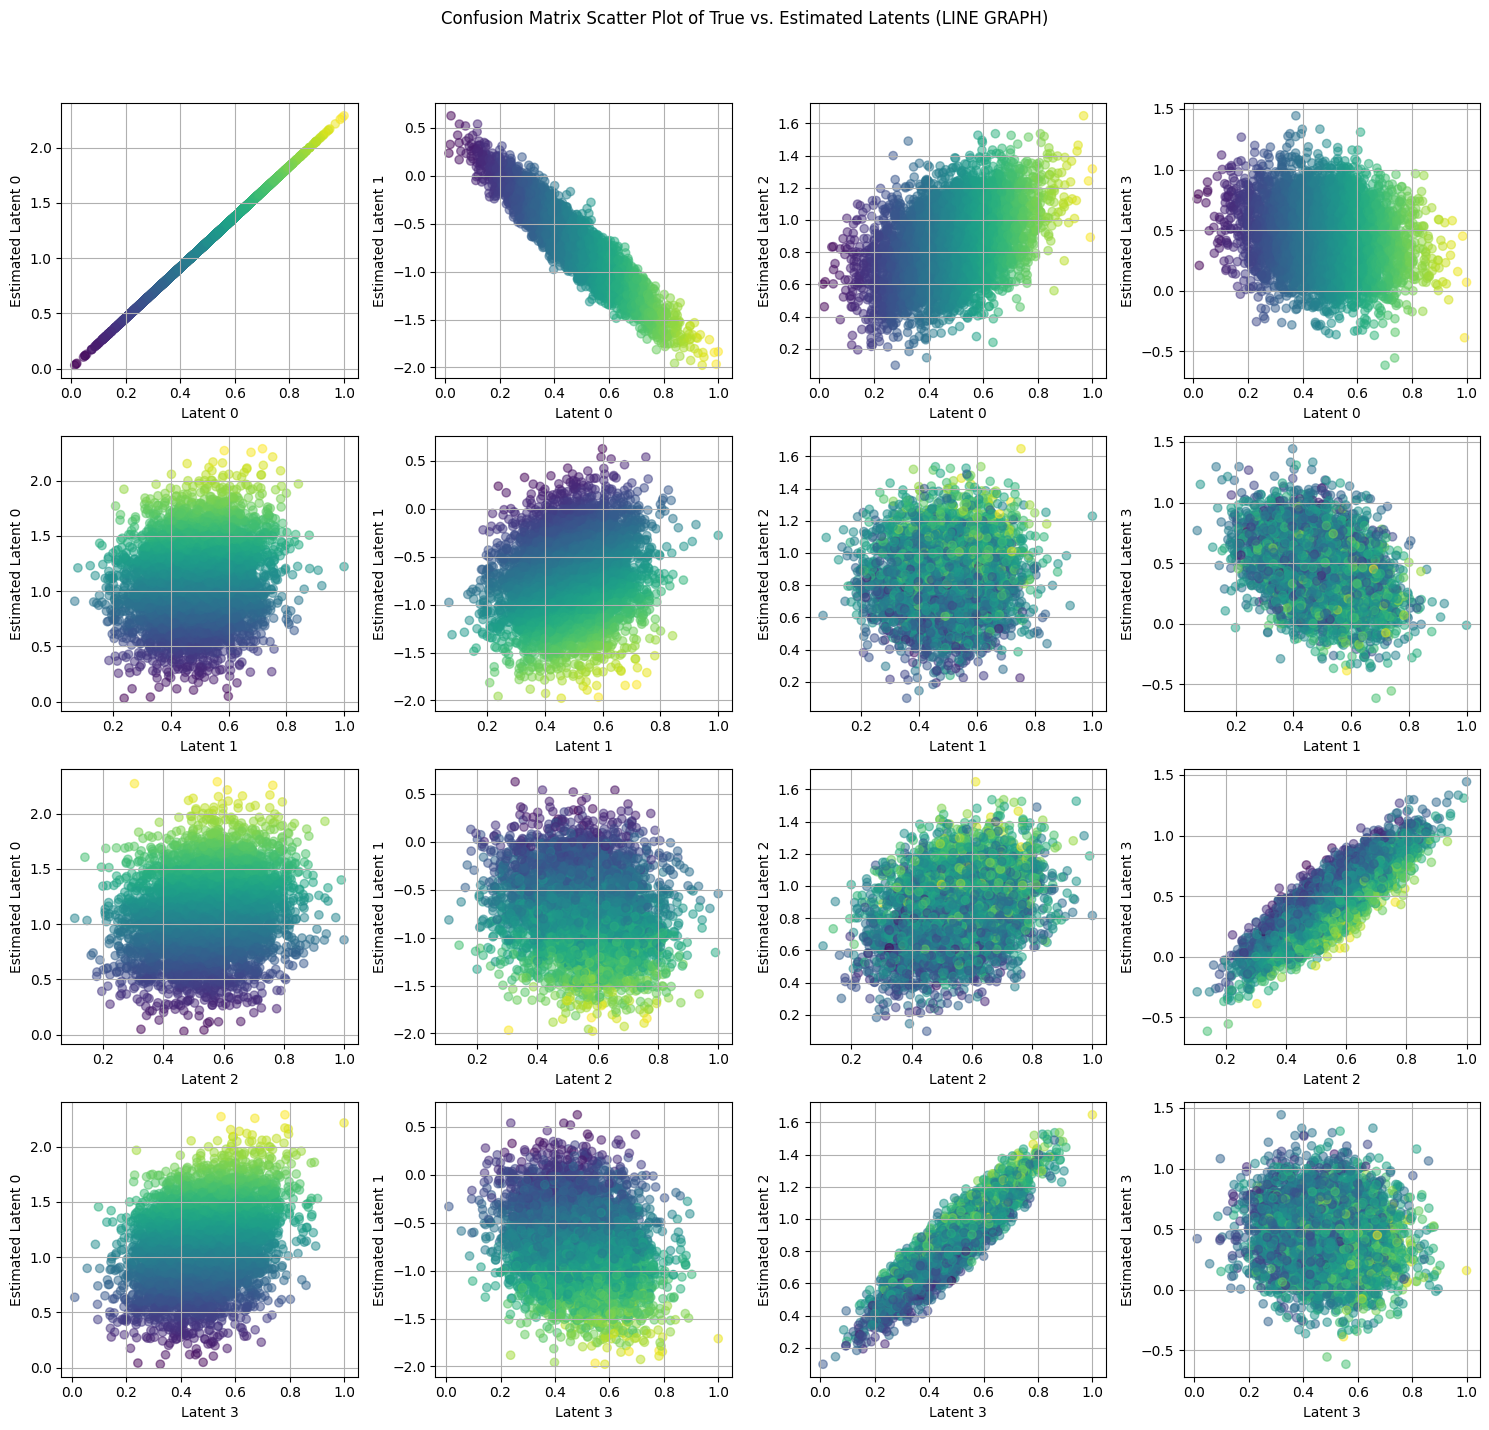

In [ ]:
U_np = U.detach().numpy()
# X_np = X.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
# Set a title for the figure
fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Latents (LINE GRAPH)')

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], id_layers[:, j], alpha=0.5,  c = U_np[:,0])  # Plotting the scatter plot
        ax.set_xlabel(f'Latent {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Latent {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

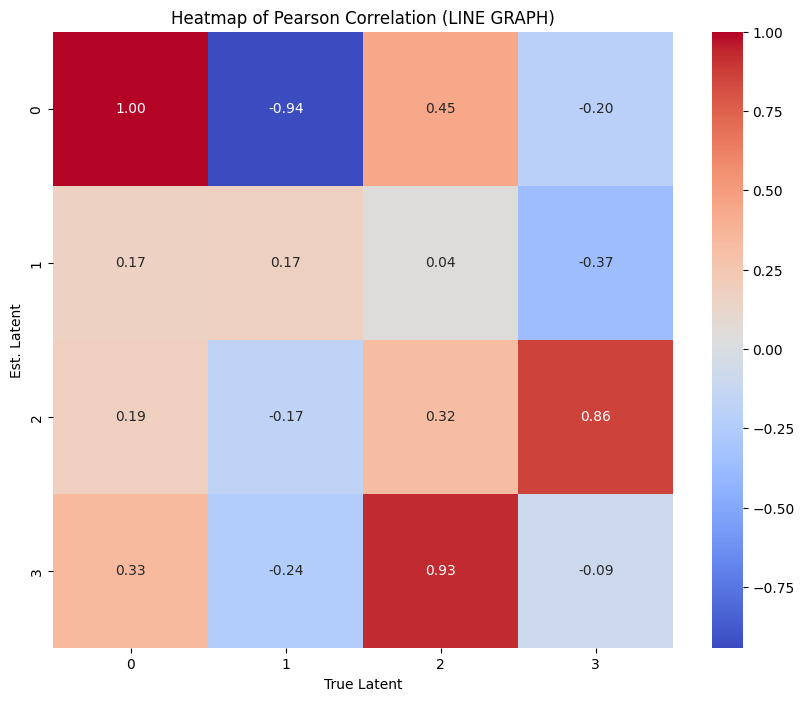

In [ ]:
#Pearson Correlation
#Mutual Information
#RMSE

results = []

for i in range(num_latent):
    for j in range(num_latent):
        # Calculate metrics
        pearson_corr = np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1]
        mutual_info = mutual_info_regression(U_np[:, i].reshape(-1, 1), id_layers[:, j])[0]
        rmse = np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j]))

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Latent': i,
            'True Latent': j,
            'Pearson Correlation': pearson_corr,
            'Mutual Information': mutual_info,
            'RMSE': rmse
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# # Print the DataFrame using tabulate for a nicer format
# print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

pivot_df = df_results.pivot(index='Est. Latent', columns='True Latent', values='Pearson Correlation')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Pearson Correlation (LINE GRAPH)')
plt.show()

In [ ]:
def noise_estimation(id_layers, layers):
    noise_estimates = np.zeros_like(id_layers)
    noise_estimates[:,0] = id_layers[:,0]
    upstream=[0]
    for layer in layers[1:]:
        for i in layer:
            degree = 2  # Degree of the polynomial features
            poly_features = PolynomialFeatures(degree=degree)
            X_poly = poly_features.fit_transform(id_layers[:,upstream])
            model = LinearRegression()
            model.fit(X_poly, id_layers[:,i])
            noise_estimates[:,i] = id_layers[:,i] - model.predict(X_poly)
        upstream+=layer
    return noise_estimates


In [ ]:
layers = [[0], [1], [2,3]]
noise_estimates = noise_estimation(id_layers, layers)

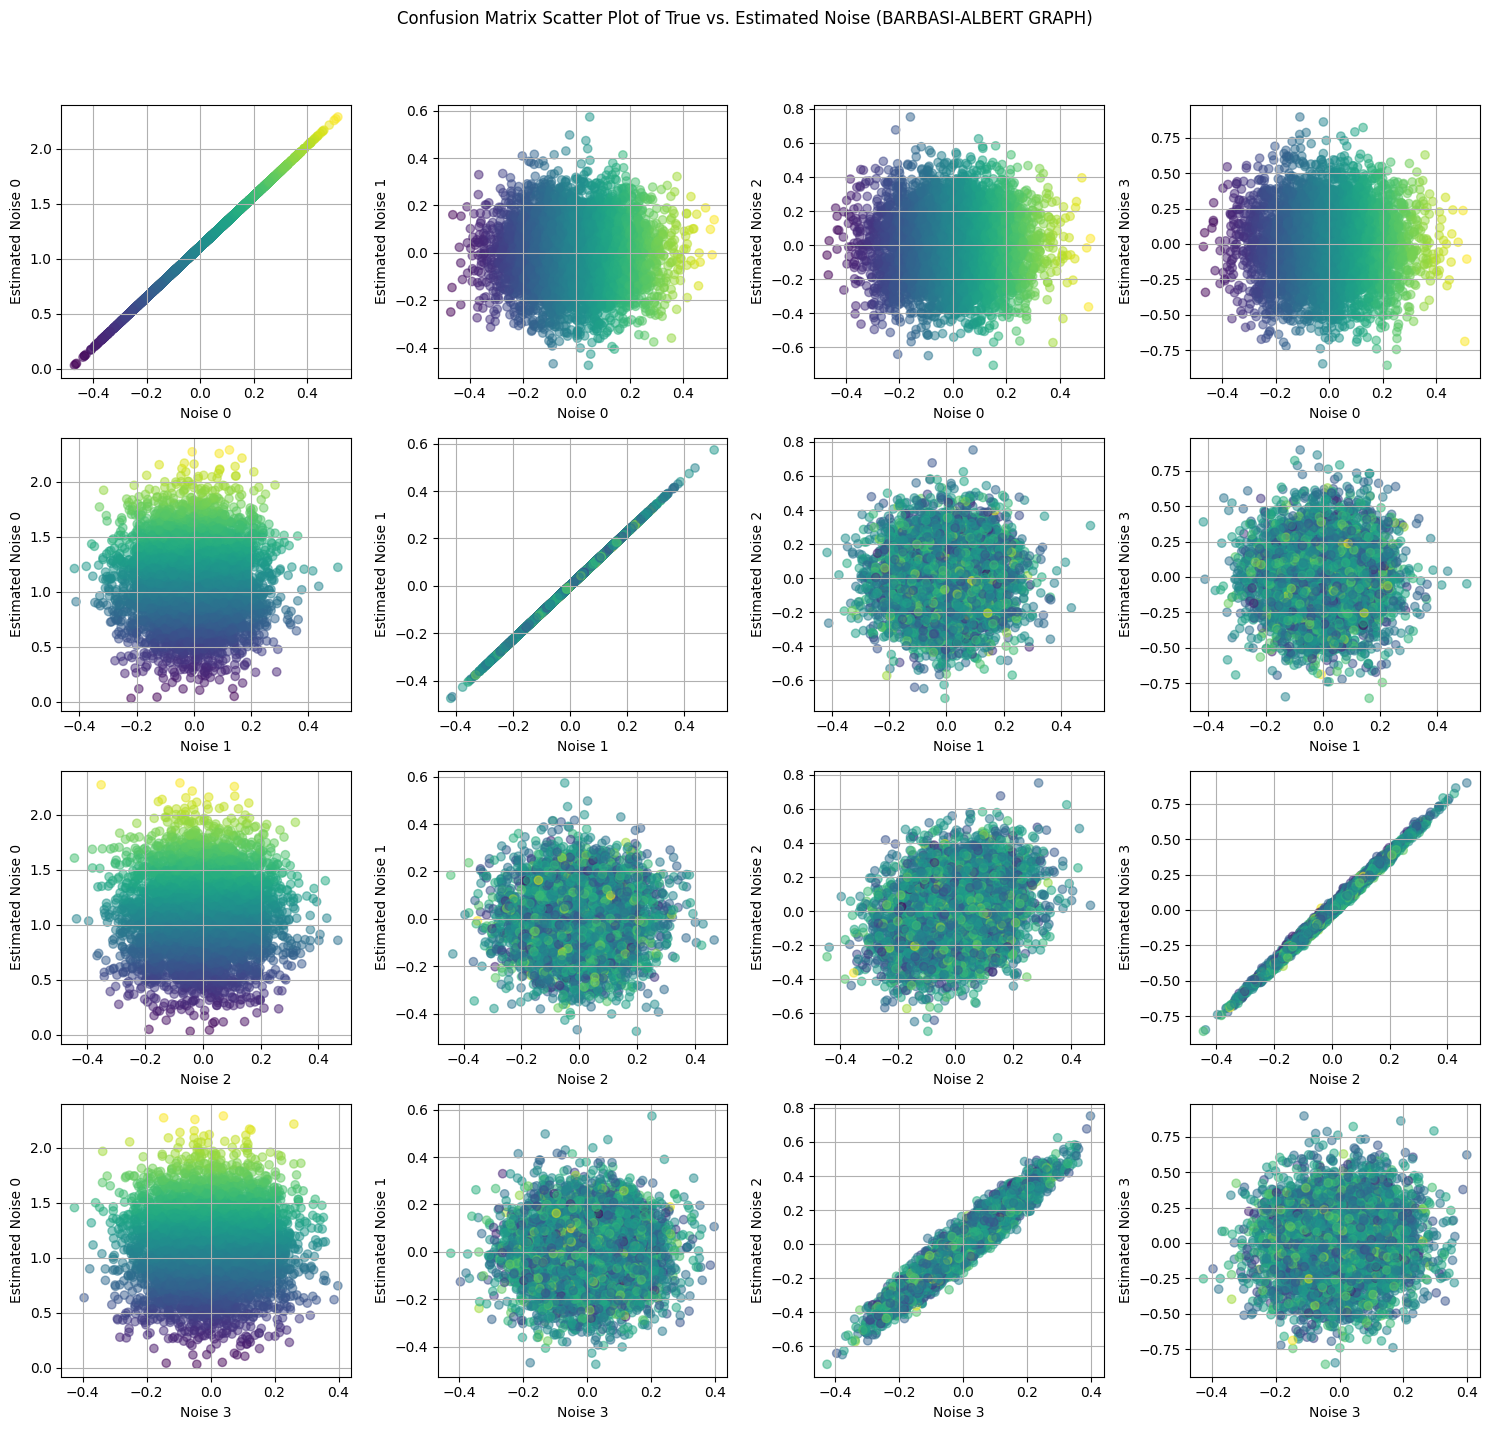

In [ ]:
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
# Set a title for the figure
fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Noise (BARBASI-ALBERT GRAPH)')

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(noises[:, i], noise_estimates[:, j], alpha=0.5, c = noises[:,0])  # Plotting the scatter plot
        ax.set_xlabel(f'Noise {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Noise {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

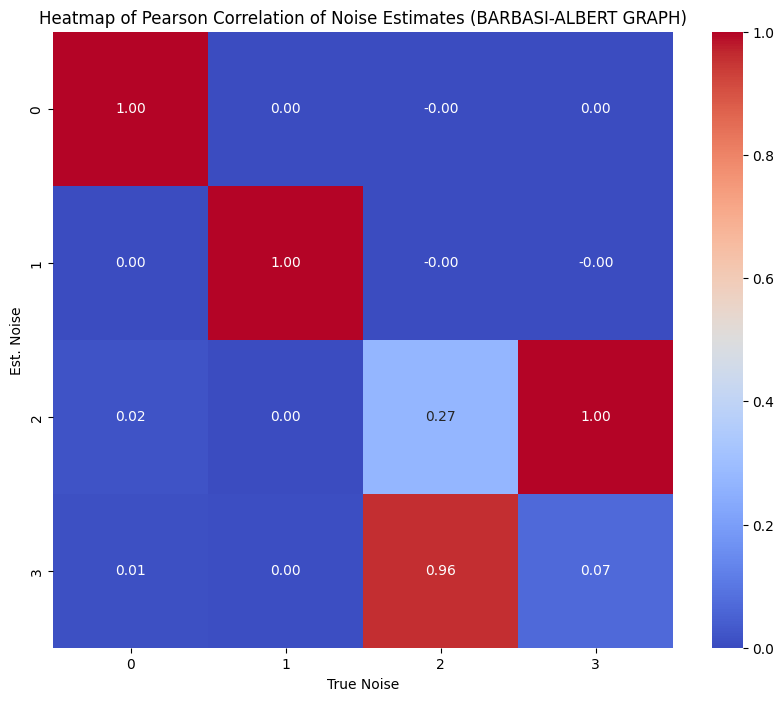

In [ ]:
results = []

for i in range(num_latent):
    for j in range(num_latent):
        # Calculate metrics
        pearson_corr = np.corrcoef(noises[:, i], noise_estimates[:, j])[0, 1]

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Noise': i,
            'True Noise': j,
            'Pearson Correlation': pearson_corr
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# # Print the DataFrame using tabulate for a nicer format
# print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

pivot_df = df_results.pivot(index='Est. Noise', columns='True Noise', values='Pearson Correlation')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Pearson Correlation of Noise Estimates (BARBASI-ALBERT GRAPH)')
plt.show()

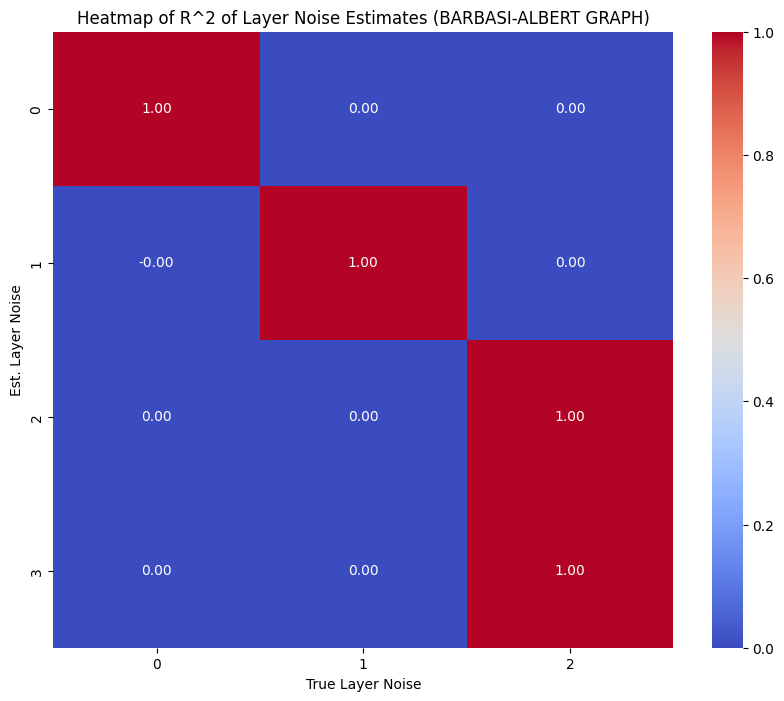

In [ ]:
results = []

for i in range(num_latent):
    for j in range(len(layers)):
        model = LinearRegression()
        model.fit(noises[:,layers[j]], noise_estimates[:,i])
        y_pred = model.predict(noises[:,layers[j]])
        r2 = r2_score(noise_estimates[:,i], y_pred)

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Layer Noise': i,
            'True Layer Noise': j,
            'R2': r2
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# # Print the DataFrame using tabulate for a nicer format
# print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

pivot_df = df_results.pivot(index='Est. Layer Noise', columns='True Layer Noise', values='R2')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of R^2 of Layer Noise Estimates (BARBASI-ALBERT GRAPH)')
plt.show()

# Random

In [157]:
DAG_type = 'random'
num_latent = 8
num_samples = 2000
lower_G = -1 #min possibel value in G or G_hat
upper_G = 1 #max possible value in G or G_hat

In [156]:
# graph = SyntheticDAG(num_latent, DAG_type)
# graph.DAG.remove_arc(1,0)
# graph.DAG.remove_arc(1,2)
# graph.DAG.remove_arc(4,3)
# graph.DAG.add_arc(0,1)
# graph.DAG.add_arc(0,2)
# graph.DAG.add_arc(2,4)
# graph.DAG.add_arc(4,5)
# graph.DAG.add_arc(3,5)
# graph.DAG.add_arc(1,5)
# graph.DAG.add_arc(1,4)
# graph.draw_graph()

there are no undirected edges
plotting...


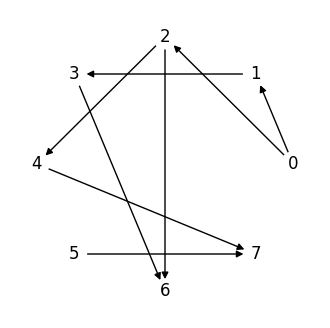

In [158]:
graph = SyntheticDAG(num_latent, DAG_type)
graph.DAG.add_arc(0,1)
graph.DAG.add_arc(1,3)
graph.DAG.add_arc(2,4)
graph.DAG.remove_arc(0,7)
graph.DAG.remove_arc(0,5)
graph.DAG.remove_arc(7,4)
graph.DAG.add_arc(4,7)
graph.DAG.add_arc(2,4)
graph.DAG.add_arc(3,6)
graph.DAG.add_arc(5,7)
graph.draw_graph()

In [159]:
G = sample_full_rank_matrix(num_latent, lower_G, upper_G)+torch.eye(num_latent)

In [160]:
U,X,noises = graph.sample_scaled(G, num_samples)

In [161]:
HU = H_U(graph,U)

In [174]:
torch.isnan(HU).nonzero(as_tuple=False)[:,0].unique().shape[0]

0

In [164]:
id_layers = identify(graph, U, G)

-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-0.33676835  0.03368493  0.45056642 -0.09869917 -0.12242349  0.08345231
 -0.33512099  0.66538828]

Optimal solution found:
[-0.21614855  0.0023176  -0.19016245  0.66143407 -0.41106398 -0.09500472
 -0.42433999 -0.16006746]

No feasible solution found.
Done.

U_hat as a linear combination of U:
[[-3.66594173e-01 -5.27368492e-01 -6.26874755e-01  5.75984598e-01
   1.74655195e+00  7.60588411e-02 -9.65398785e-01  2.21408234e+00]
 [ 8.58398247e-01  5.82151342e-01  7.92101927e-01  3.42161285e-01
  -3.37798043e+00  8.39315317e-01 -1.55283419e+00 -3.99186820e-03]
 [ 2.88014625e+00  1.35880621e+00  2.95013935e+00 -2.20919068e+00
  -5.87424711e+00  1.25655091e+00 -3.82398072e-04 -5.70348557e-03]
 [ 1.20792997e+00 -2.58682259e+00  3.59032136e+00 -9.03691359e-01
  -4.23606387e+00  5.84116059e+00 -2.77008093e-03  1.45803881e-02]
 [-2.46484380e+00  4.71425252e+00 -2.01077827e+00 -6.19785123e-01
   8.79615303e-01 -2.44006462e+00  4.63684516e-03 -2.49718309e-02]
 [-2.85527865e-0

INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[ 0.57853363 -0.51226365  0.40607998 -0.20045954 -0.20661354 -0.38529778]

Optimal solution found:
[ 0.21554317  0.23277715 -0.25031943  0.35215352  0.47861538 -0.68953152]

Optimal solution found:
[ 0.17021159  0.69093568 -0.01249033 -0.17906384 -0.63606154 -0.24195883]

No feasible solution found.
Done.

U_hat as a linear combination of U:
[[ 5.57077635e+00 -1.95625486e+00  5.31825969e+00 -2.51170082e+00
  -4.53015384e+00 -1.72545667e+00]
 [ 5.40784991e+00 -3.40821132e+00  6.50695965e+00 -1.41798421e+00
  -1.04637388e+01  6.62048686e+00]
 [ 2.09216834e+00 -2.69328925e+00  5.95902256e+00 -2.68570959e+00
  -5.94967195e+00  4.93252027e+00]
 [-5.86242008e+00  5.49112286e+00 -1.74297509e+00  2.00142983e-02
   4.39412626e-02 -3.52000917e-02]
 [-1.16604299e+01  2.00146571e+01 -1.46052003e+01  4.14410126e-02
   9.10095502e-02 -7.30043997e-02]
 [ 1.74859389e+01 -2.45085191e+01  1.63358968e+01 -6.12318235e-02
  -1.34458238e-01  1.07804160e-01]]

Peeled off 3 nodes.
----

INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-0.80122786  0.          0.54805522]

Optimal solution found:
[-0.37337822  0.77272553 -0.54585929]

No feasible solution found.
Done.

U_hat as a linear combination of U:
[[ 1.47873193e+01 -1.89232490e+01  1.09830827e+01]
 [-1.58897010e+01  2.59006982e+01 -1.89004259e+01]
 [ 9.41322532e-01  8.02907341e-04 -5.46953812e-04]]

Peeled off 2 nodes.
-----------------------------------------------------------
Removing Layer 4.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Peeled off 1 nodes.


In [165]:
id_layers

array([[  0.49382865,  -2.74886758,   4.86311979, ...,  -1.9758366 ,
          1.8634062 ,  -0.866945  ],
       [  0.65116155,   5.3265768 ,  -6.56472829, ...,  -0.68533529,
          1.42196347,  -1.57520224],
       [  0.36796841,   5.90021451,  -8.84866222, ...,   2.0198099 ,
          0.67951794,  -0.78161888],
       ...,
       [  0.49676979,   3.09811025,  -4.53827258, ...,   1.3194764 ,
          0.68326423,  -0.20884777],
       [  0.32819501,   5.52701275,  -8.00375762, ...,   1.4395975 ,
          1.81088512,  -1.01206401],
       [  0.38333568,  10.15966841, -15.18285461, ...,   2.32372897,
          1.46482726,  -1.15719548]])

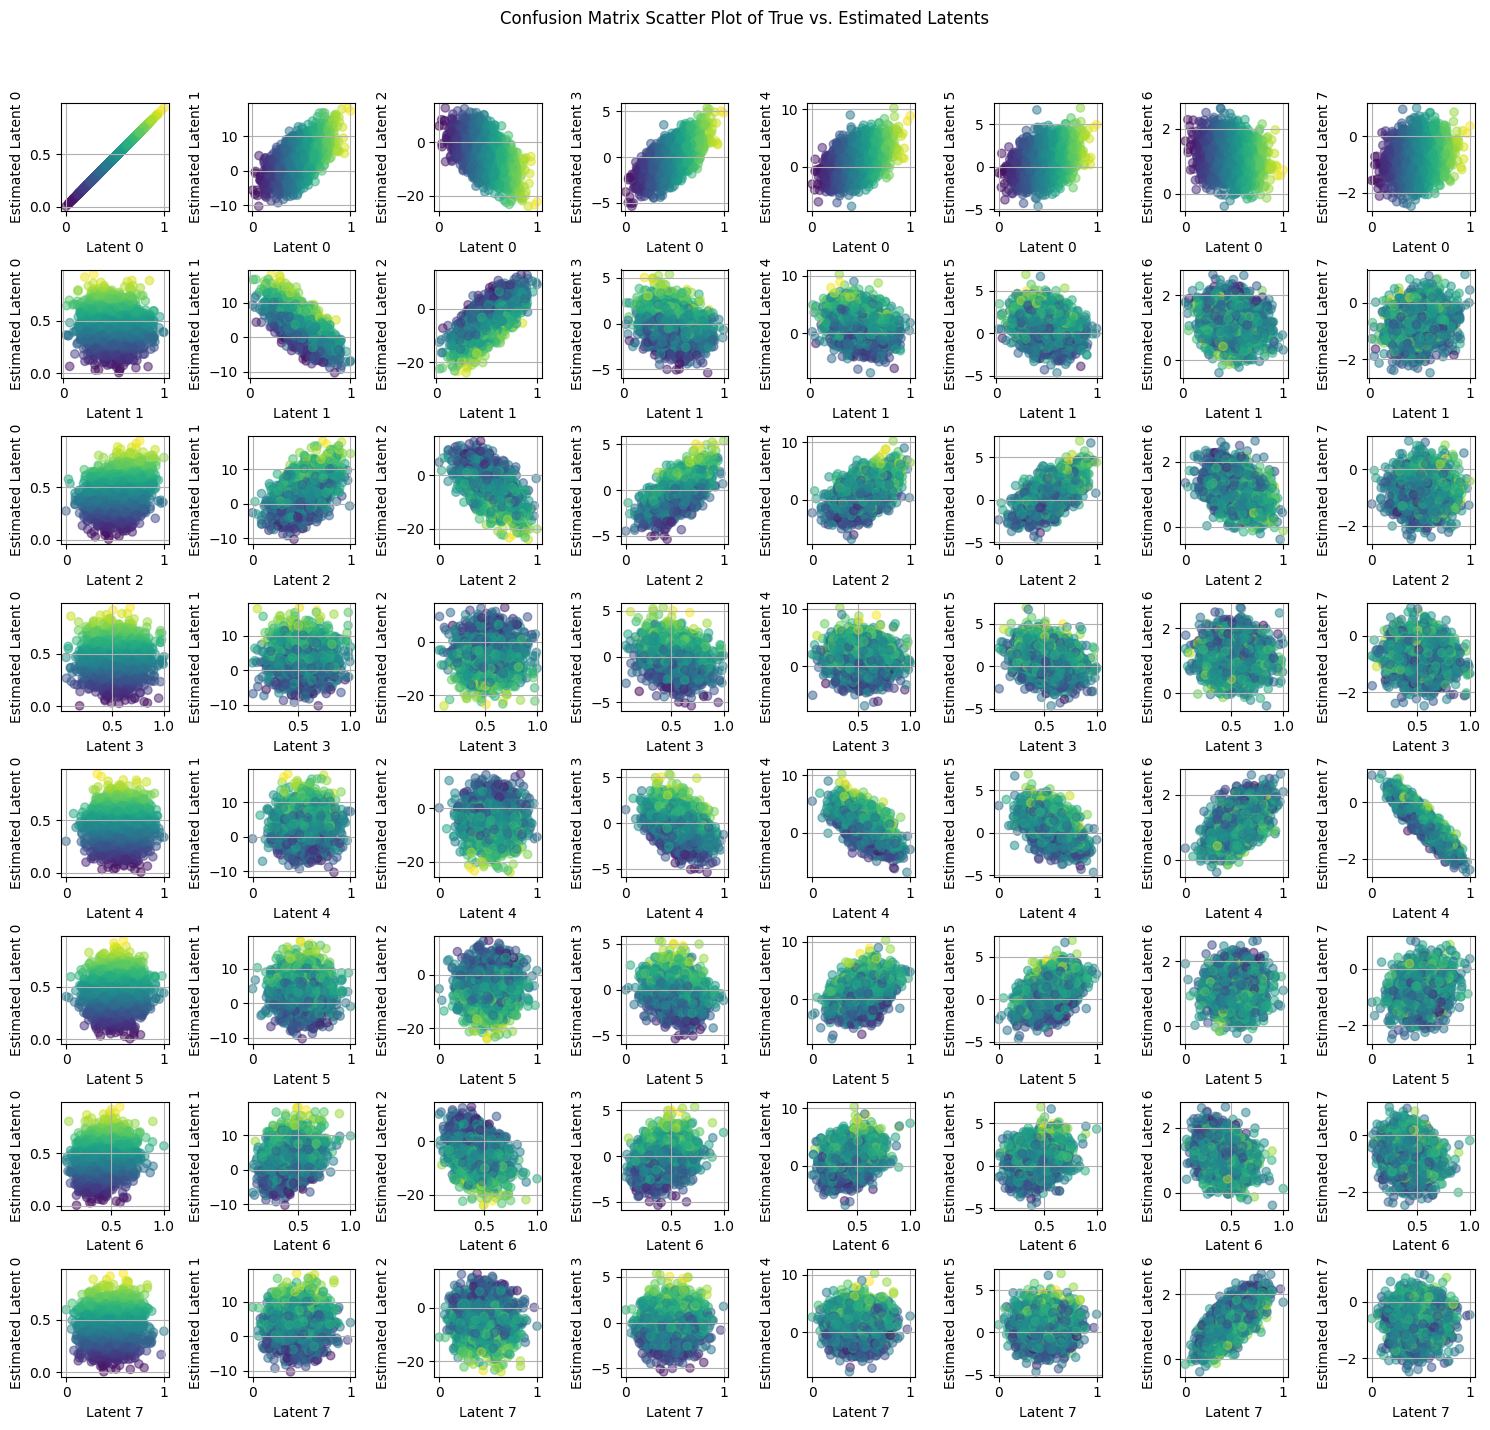

In [166]:
U_np = U.detach().numpy()
# X_np = X.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
# Set a title for the figure
fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Latents')

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], id_layers[:, j], alpha=0.5,  c = U_np[:,0])  # Plotting the scatter plot
        ax.set_xlabel(f'Latent {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Latent {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

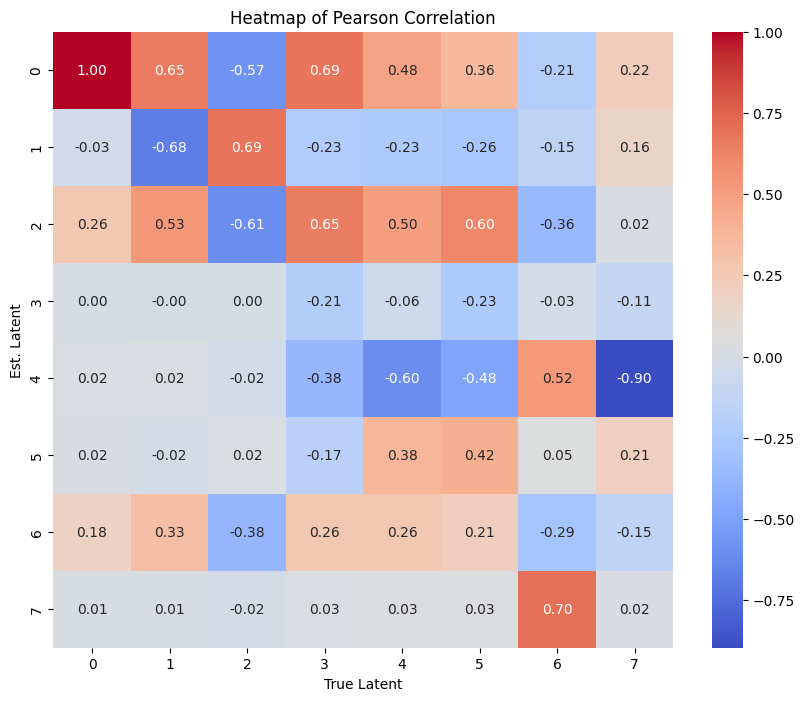

In [167]:
#Pearson Correlation
#Mutual Information
#RMSE

results = []

for i in range(num_latent):
    for j in range(num_latent):
        # Calculate metrics
        pearson_corr = np.corrcoef(U_np[:, i], id_layers[:, j])[0, 1]
        mutual_info = mutual_info_regression(U_np[:, i].reshape(-1, 1), id_layers[:, j])[0]
        rmse = np.sqrt(mean_squared_error(U_np[:, i], id_layers[:, j]))

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Latent': i,
            'True Latent': j,
            'Pearson Correlation': pearson_corr,
            'Mutual Information': mutual_info,
            'RMSE': rmse
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# # Print the DataFrame using tabulate for a nicer format
# print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

pivot_df = df_results.pivot(index='Est. Latent', columns='True Latent', values='Pearson Correlation')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Pearson Correlation')
plt.show()

In [168]:
def noise_estimation(id_layers, layers):
    noise_estimates = np.zeros_like(id_layers)
    noise_estimates[:,0] = id_layers[:,0]
    upstream=[0]
    for layer in layers[1:]:
        for i in layer:
            degree = 2  # Degree of the polynomial features
            poly_features = PolynomialFeatures(degree=degree)
            X_poly = poly_features.fit_transform(id_layers[:,upstream])
            model = LinearRegression()
            model.fit(X_poly, id_layers[:,i])
            noise_estimates[:,i] = id_layers[:,i] - model.predict(X_poly)
        upstream+=layer
    return noise_estimates


In [169]:
layers = [[0], [1,2], [3,4,5], [6,7]]
noise_estimates = noise_estimation(id_layers, layers)

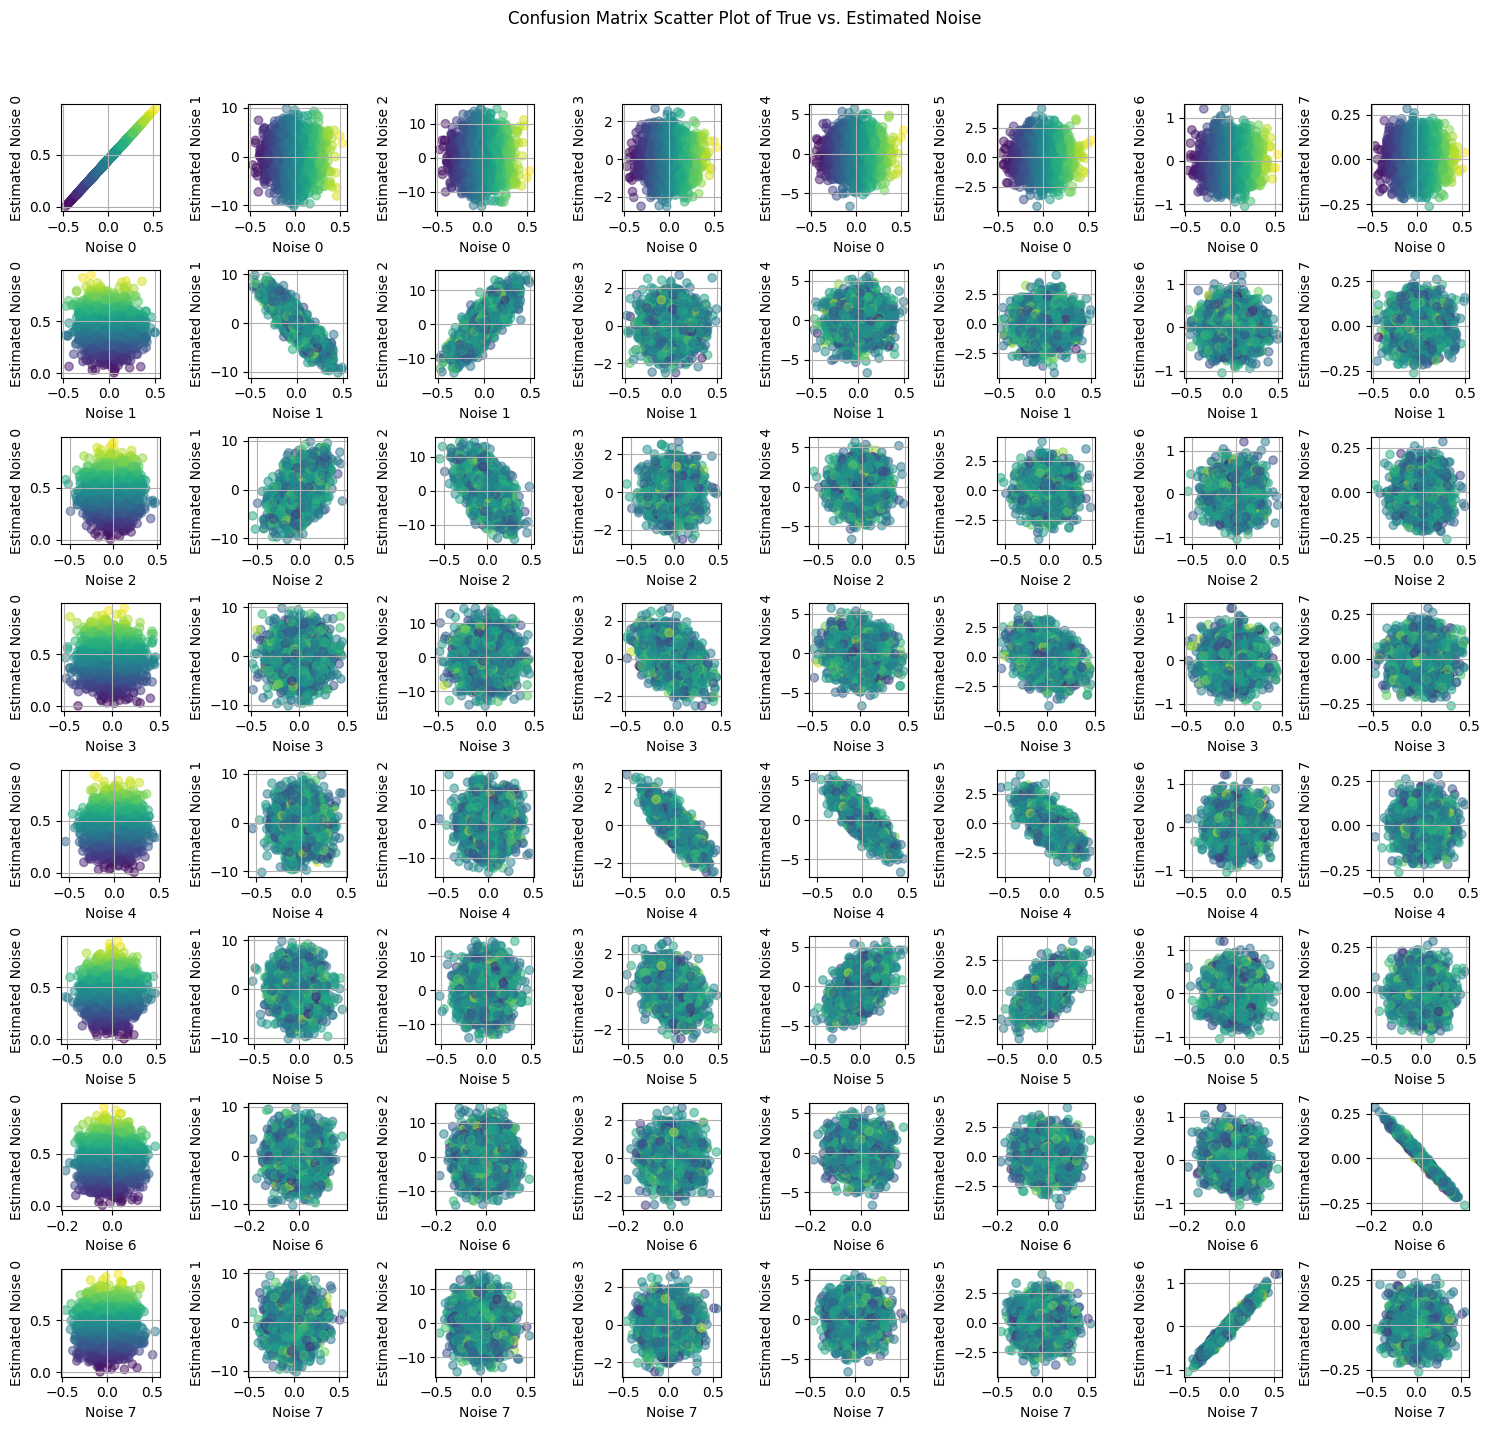

In [170]:
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
# Set a title for the figure
fig.suptitle('Confusion Matrix Scatter Plot of True vs. Estimated Noise')

# Iterate over each combination of columns in A and B
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(noises[:, i], noise_estimates[:, j], alpha=0.5, c = noises[:,0])  # Plotting the scatter plot
        ax.set_xlabel(f'Noise {i}')  # Set x-axis label
        ax.set_ylabel(f'Estimated Noise {j}')  # Set y-axis label
        ax.grid(True)  # Optional: Adds grid to the plots for better visibility

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

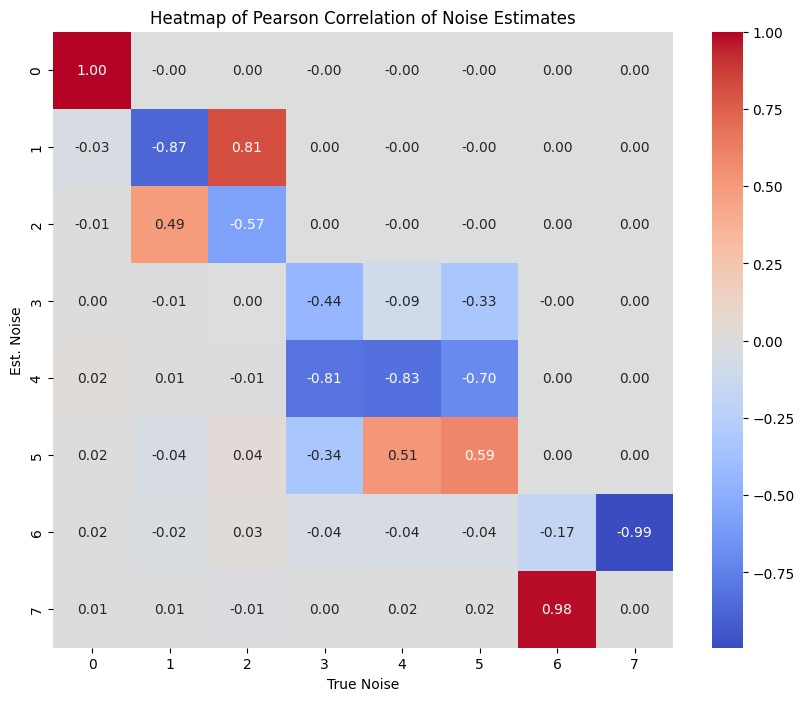

In [171]:
results = []

for i in range(num_latent):
    for j in range(num_latent):
        # Calculate metrics
        pearson_corr = np.corrcoef(noises[:, i], noise_estimates[:, j])[0, 1]

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Noise': i,
            'True Noise': j,
            'Pearson Correlation': pearson_corr
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# # Print the DataFrame using tabulate for a nicer format
# print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

pivot_df = df_results.pivot(index='Est. Noise', columns='True Noise', values='Pearson Correlation')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Pearson Correlation of Noise Estimates')
plt.show()

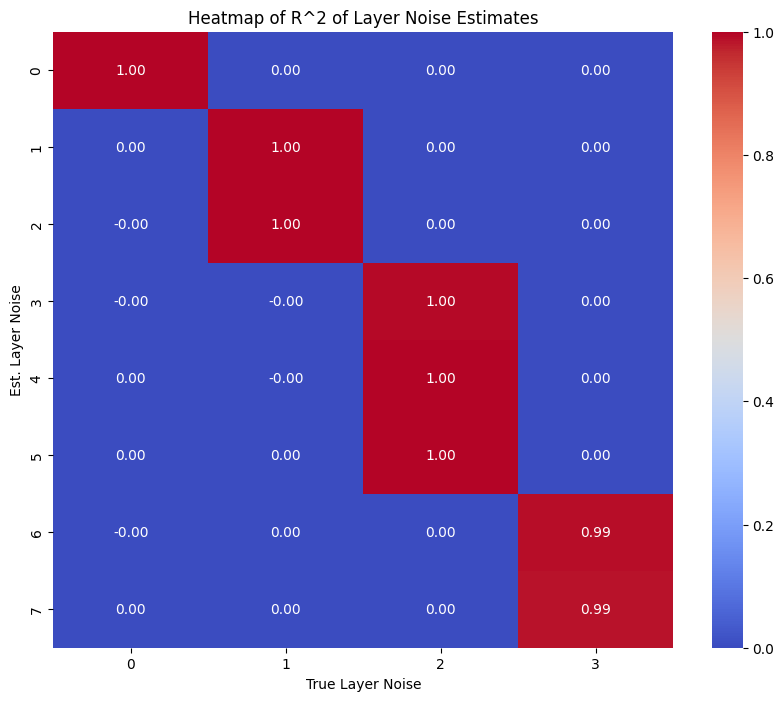

In [172]:
results = []

for i in range(num_latent):
    for j in range(len(layers)):
        model = LinearRegression()
        model.fit(noises[:,layers[j]], noise_estimates[:,i])
        y_pred = model.predict(noises[:,layers[j]])
        r2 = r2_score(noise_estimates[:,i], y_pred)

        # Append the results as a dictionary to the results list
        results.append({
            'Est. Layer Noise': i,
            'True Layer Noise': j,
            'R2': r2
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# # Print the DataFrame using tabulate for a nicer format
# print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False))

pivot_df = df_results.pivot(index='Est. Layer Noise', columns='True Layer Noise', values='R2')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of R^2 of Layer Noise Estimates')
plt.show()